In [1]:
# @toffanetto

import k_nn_classification as knn 
import matplotlib.pyplot as plt
import numpy as np


/home/toffanetto/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# Getting train data
X_train, y_train, classes_rate_train = knn.getData(train=True, raw= False)

Y_data = [X_train, y_train]

# Getting test data
X_test, y_test, classes_rate_test = knn.getData(train=False, raw= False)

Y_test = [X_test, y_test]

In [3]:
#k, ba = knn.findBestK(x=Y_test[0], Y =Y_data, y_label=Y_test[1], classes_rate=classes_rate_test)

# np.save('../model/knn/processed_data/ba.npy', ba)

k, ba = knn.kFoldValidation(x=X_train,y=y_train,k=4, classes_rate=classes_rate_test)

In [5]:
print(k)
print(ba)

np.save('../model/knn/processed_data/ba_kfold.npy', ba)
np.save('../model/knn/processed_data/k_kfold.npy', ba)

[17, 28, 12, 18]
[array([0.        , 0.8614923 , 0.8386781 , 0.8759432 , 0.87055727,
       0.88490498, 0.8798866 , 0.89041418, 0.88778568, 0.89275638,
       0.88571462, 0.89112231, 0.88521615, 0.89055599, 0.88872778,
       0.89178208, 0.8893041 , 0.89276548, 0.88787074, 0.89177534,
       0.89143105, 0.88857527, 0.88762332, 0.88836292, 0.88680568,
       0.88757772, 0.88536406, 0.88749774, 0.88806485, 0.89117499]), array([0.        , 0.84353053, 0.85048571, 0.86451822, 0.8662585 ,
       0.86406597, 0.86803987, 0.85891429, 0.8674074 , 0.86135833,
       0.87227891, 0.85974908, 0.86464059, 0.8614383 , 0.8666567 ,
       0.86782034, 0.87079509, 0.86719849, 0.87104048, 0.86489015,
       0.86833615, 0.86621526, 0.86866427, 0.86559159, 0.86896305,
       0.86822349, 0.87015373, 0.8714497 , 0.87261398, 0.87093255]), array([0.        , 0.84572047, 0.84775902, 0.85049969, 0.84843033,
       0.85144412, 0.84759411, 0.85060845, 0.853574  , 0.85234371,
       0.85580273, 0.85444617, 0.8559255

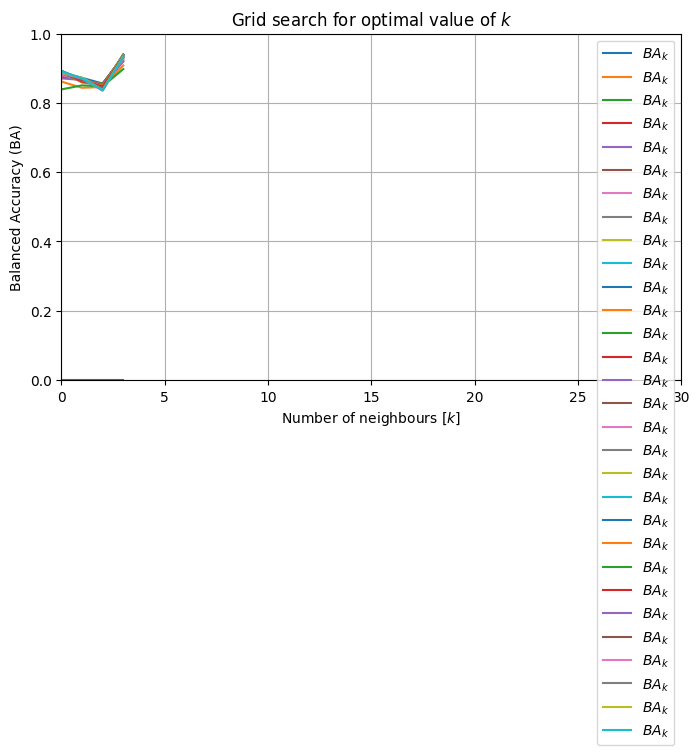

In [8]:
try:
    ba
except:
    ba = np.load('../model/knn/processed_data/ba.npy')
    k = np.argmax(ba)+1

n = np.linspace(1,30,30)

plt.figure(figsize=(8,4.5))
plt.plot(n,ba,label=f'$BA_k$')
plt.plot(k,max(ba),'or',label=f'$max(BA_k)$',linewidth=5)
plt.xlabel(f'Number of neighbours [$k$]')
plt.ylabel('Balanced Accuracy (BA)')
plt.title(f'Grid search for optimal value of $k$')
plt.legend()
plt.grid()
plt.xlim([0, 30])
plt.ylim([0, 1])

plt.savefig("../plot/knn_1/grid_search.pdf", format="pdf", bbox_inches="tight")




In [ ]:
# y_hat = knn.classify(x=Y_test[0], Y=Y_data, y_label=Y_test[1], k=k)

# np.save('../model/knn/processed_data/y_hat.npy', y_hat)

In [ ]:
try:
    y_hat
except:
    y_hat = np.load('../model/knn/processed_data/y_hat.npy')

confusion_matrix, ba_optimal = knn.rateModel(y=Y_test[1].T[0], y_hat=y_hat, classes_rate=classes_rate_test)

print('Confusion Matrix: \n'+str(confusion_matrix))
print('BA = '+str(ba_optimal))

In [ ]:
score = knn.confusionMatrixExtract(confusion_matrix=confusion_matrix)

for i in range(1,7):
    print(str(i)+'\t'+str("{:.4f}".format(score[i]['Precision']))+'\t'+str("{:.4f}".format(score[i]['Recall'])))